In [846]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Define an array
### Define a matrix
### Do dot multiplication
### Do matrix multiplication

In [396]:
# x and y array
x = np.array([1,1,1,1])
y = np.array([2,2,2,2])

print ("X is an array:",x)
print("Y is an array:",y,'\n')
#Dot multiplication of x and y
z = np.dot(x,y)
print("The dot product of X and Y is:",np.sum(x*y))
print("The dot product of X and Y is:",x@np.transpose(y))
print("The dot product of X and Y is:",z,'\n')


#a and b are matrices
a = np.array([[1,2,3],[4,5,6]])
b = np.transpose(a)*4
print("The matrix a is:\n",a)
print("The matrix b is:\n",b,'\n')
print("The shape of matrix a is:",np.shape(a))
print("The shape of matrix b is:",np.shape(b),'\n')
print("The size of matrix of a and b is:",np.size(a),np.size(b),'respectively \n')

#c matrix multiplication of a and b
print("The matrix multiplication of a and b is:\n",a@b)
print("The matrix multiplication of a and b is:\n",np.matmul(a,b))

X is an array: [1 1 1 1]
Y is an array: [2 2 2 2] 

The dot product of X and Y is: 8
The dot product of X and Y is: 8
The dot product of X and Y is: 8 

The matrix a is:
 [[1 2 3]
 [4 5 6]]
The matrix b is:
 [[ 4 16]
 [ 8 20]
 [12 24]] 

The shape of matrix a is: (2, 3)
The shape of matrix b is: (3, 2) 

The size of matrix of a and b is: 6 6 respectively 

The matrix multiplication of a and b is:
 [[ 56 128]
 [128 308]]
The matrix multiplication of a and b is:
 [[ 56 128]
 [128 308]]


### Fourier series

#### Build target function and define the x_range

The harmonic number for cosine is: 1
The harmonic number for sine is: 3 

The orginal omega(angular frequency for cos is: 1.0
The orginal omega(angular frequency for sin is: 3.0 



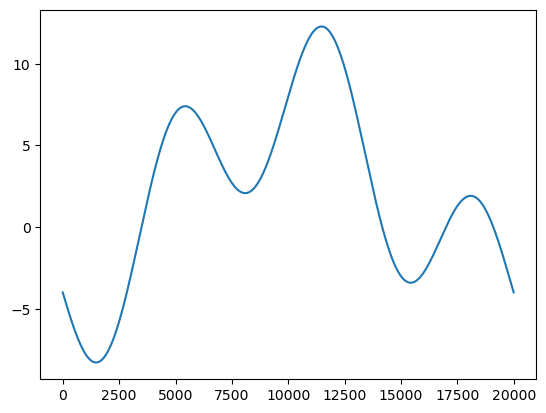

In [702]:
###################   Given #################################
#Original function
L = np.pi #it is from range -L to L
dx = 0.0001
x_range = L*(np.arange(-1,1,dx))
A0_given = 2 #intial value

harmonic_cos = 1  # original harmonics used for constructing the target function
harmonic_sin = 3 # original harmonics used for constructing the target function

print("The harmonic number for cosine is:",harmonic_cos)
print("The harmonic number for sine is:",harmonic_sin,'\n')
###########################################################################

omega_cos = harmonic_cos*2*np.pi/(2*L) #angular frequency (note the period is l--L = 2L
omega_sin = harmonic_sin*2*np.pi/(2*L) #angular frequency

print("The orginal omega(angular frequency for cos is:",omega_cos)
print("The orginal omega(angular frequency for sin is:",omega_sin,'\n')

Amplitude_sin =5
Amplitude_cosine = 6

original_func = A0_given + Amplitude_sin*np.sin(omega_sin*x_range) + Amplitude_cosine*np.cos(omega_cos*x_range)
#Plot the original function
plt.plot(original_func)

#### Fourier series determine An Bn constants (Using integration) np.trapz

2.000199882183331

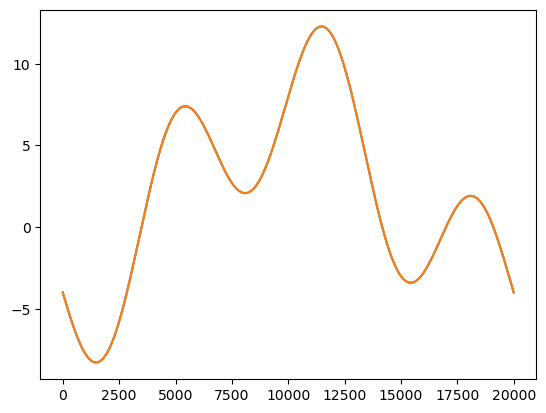

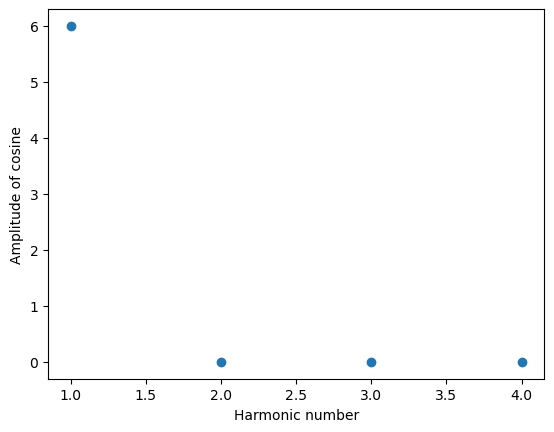

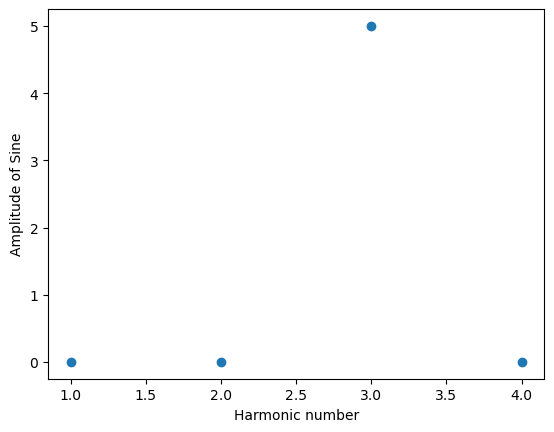

In [488]:
### Fourier series
number_of_fourier_func = 4
#Determine the sin function amplitude
A0 = np.trapz(original_func,x_range)*1/(2*L)
An = np.array([])
Bn = np.array([])
computed_func = np.zeros(len(x_range)) + A0
for i in range(number_of_fourier_func):
    k = i+1
    An = np.append(An,np.trapz(original_func*np.cos(np.pi*k*x_range/L),x_range)*1/L) # or u can use the dot product with scale down steve burton
    #An = np.append(An,np.sum(original_func*np.cos(np.pi*k*x_range/L))*L*dx*1/L) ## Bn alternative 2 using np.sum instead of np.trapz
    #An = np.append(An,np.sum(original_func*np.cos(np.pi*k*x_range/L))*dx)### Bn alternative canceling L by L from the np.sum equation
    Bn = np.append(Bn,np.trapz(original_func*np.sin(np.pi*k*x_range/L),x_range)*1/L)
    #Bn = np.append(Bn,np.sum(original_func*np.sin(np.pi*k*x_range/L))*L*dx*1/L) ## Bn alternative 2 using np.sum instead of np.trapz
    #Bn = np.append(Bn,np.sum(original_func*np.sin(np.pi*k*x_range/L))*dx) ### Bn alternative canceling L by L from the np.sum equation
    computed_func = computed_func + An[i]*np.cos(np.pi*k*x_range/L) + Bn[i]*np.sin(np.pi*k*x_range/L)

plt.plot(computed_func)
plt.plot(original_func)

plt.figure()
plt.plot(list(range(1,number_of_fourier_func + 1,1)),list(An),'o')
plt.ylabel("Amplitude of cosine")
plt.xlabel("Harmonic number")

plt.figure()
plt.plot(list(range(1,number_of_fourier_func + 1,1)),Bn,'o')
plt.ylabel("Amplitude of Sine")
plt.xlabel("Harmonic number")
                                                      
#An = np.trapz(originalfunc*np.cos(,x_range)

#Determine the cosine function amplitude

# print(An,Bn)
# print(np.dot(np.sin(x_range),np.sin(x_range)))
# print(list(An),list(range(1,number_of_fourier_func + 1,1)),'o')

#### Fourier series determine An Bn constants (Using projection) np.dot

2.000000000000661


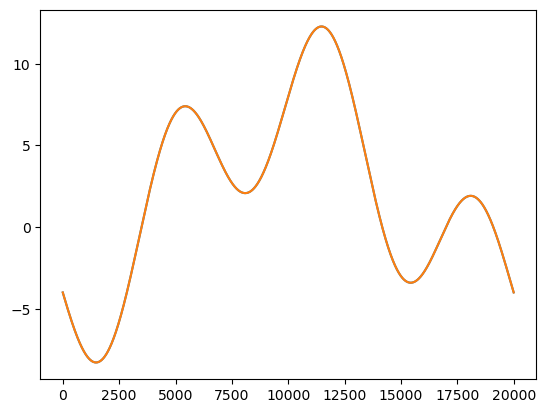

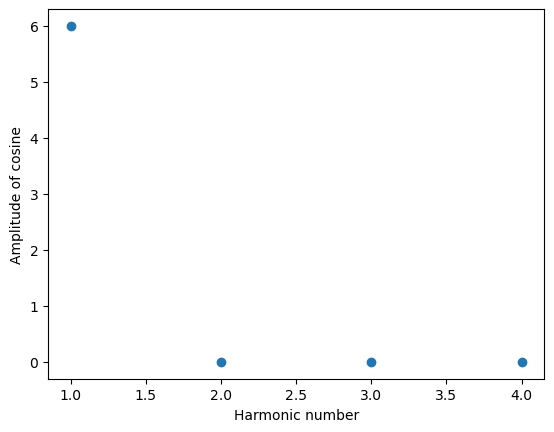

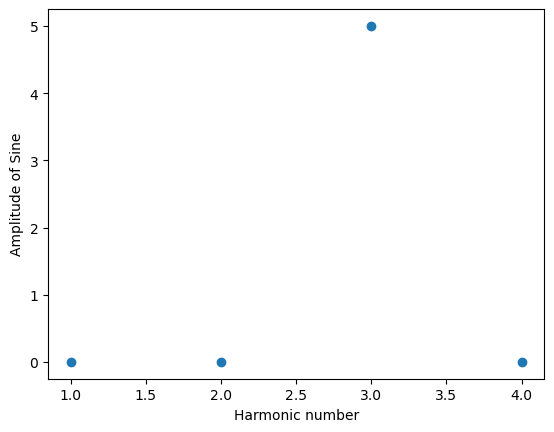

In [556]:
### Fourier series
number_of_fourier_func = 4
#Determine the sin function amplitude
A0 = np.dot(original_func,np.ones_like(x_range))/np.dot(np.ones_like(x_range),np.ones_like(x_range))### Using dot
An = np.array([])
Bn = np.array([])
computed_func = np.zeros(len(x_range)) + A0
for i in range(number_of_fourier_func):
    k = i+1
    An = np.append(An,np.dot(original_func,np.cos(np.pi*k*x_range/L))/np.dot(np.cos(np.pi*k*x_range/L),np.cos(np.pi*k*x_range/L))) # or u can use the dot product with scale down steve burton
    Bn = np.append(Bn,np.dot(original_func,np.sin(np.pi*k*x_range/L))/np.dot(np.sin(np.pi*k*x_range/L),np.sin(np.pi*k*x_range/L)))
    # print(np.size(An))
    # print(np.size(Bn))
    # print(np.size(A0))
    computed_func = computed_func + An[i]*np.cos(np.pi*k*x_range/L) + Bn[i]*np.sin(np.pi*k*x_range/L)

plt.plot(computed_func)
plt.plot(original_func)

plt.figure()
plt.plot(list(range(1,number_of_fourier_func + 1,1)),list(An),'o')
plt.ylabel("Amplitude of cosine")
plt.xlabel("Harmonic number")

plt.figure()
plt.plot(list(range(1,number_of_fourier_func + 1,1)),Bn,'o')
plt.ylabel("Amplitude of Sine")
plt.xlabel("Harmonic number")
                                                      
#An = np.trapz(originalfunc*np.cos(,x_range)

#Determine the cosine function amplitude

# print(An,Bn)
# print(np.dot(np.sin(x_range),np.sin(x_range)))
# print(list(An),list(range(1,number_of_fourier_func + 1,1)),'o')
print(A0)

#### Fourier series determine Ck constant for the exponential form (using np.dot)

Text(0.5, 0, 'Harmonic number')

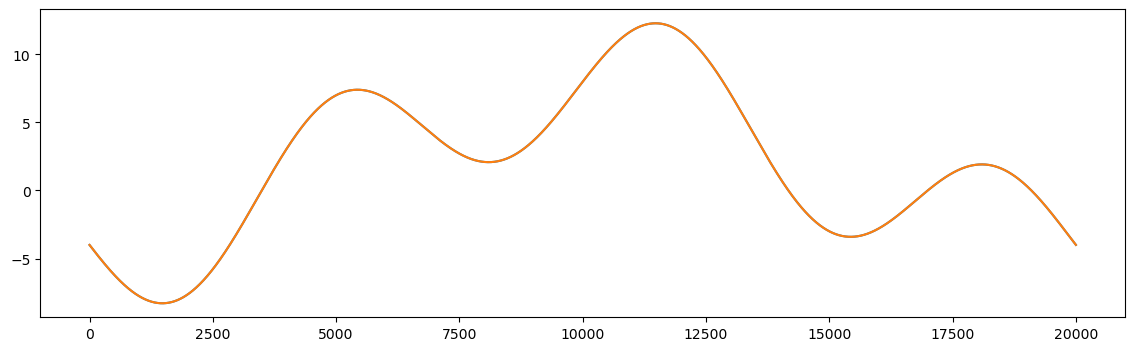

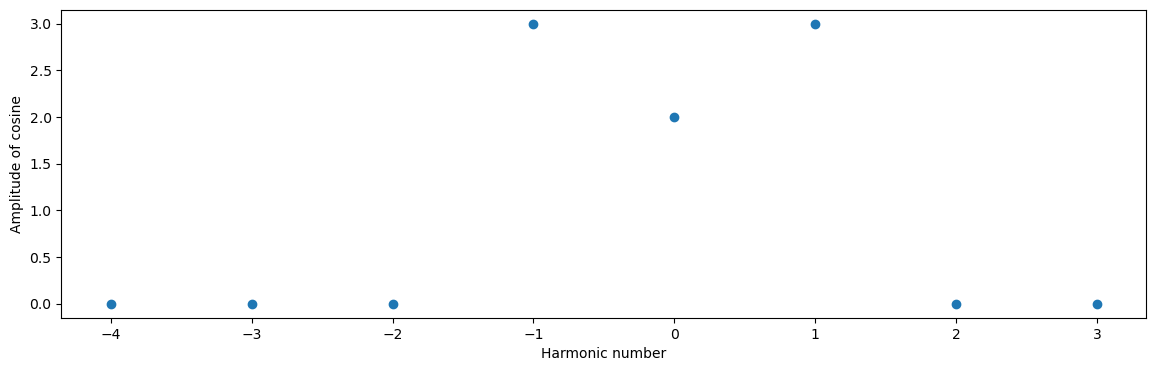

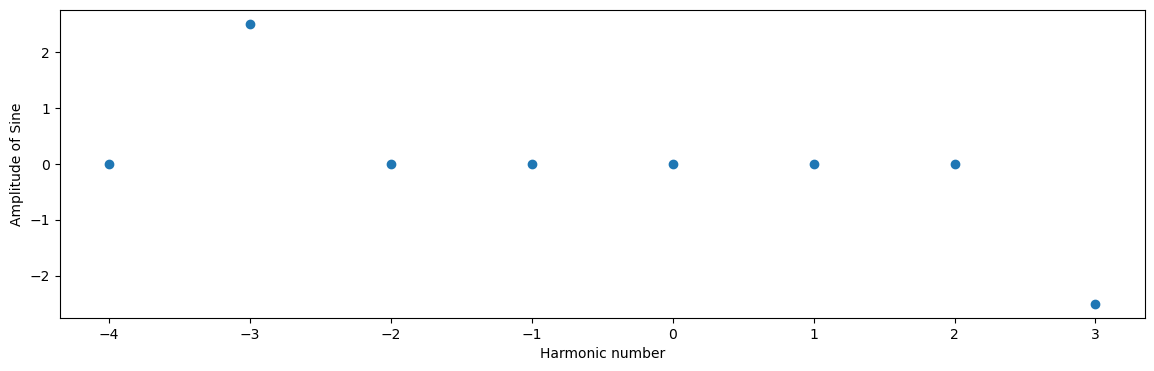

In [974]:
### Fourier series
number_of_fourier_func = 4
#Determine the sin function amplitude
Ck = np.array([])
computed_func = np.zeros(len(x_range)) 
for k in range(-number_of_fourier_func,number_of_fourier_func,1):
    g_x = np.exp(k*np.pi*x_range*1j/L)
    Ck = np.append(Ck,np.dot(original_func,np.conj(g_x))/(np.dot(g_x,np.conj(g_x))))
    computed_func = computed_func + Ck[-1]*g_x 

plt.plot(computed_func.real)
plt.plot(original_func)
plt.figure()
plt.plot(list(range(-number_of_fourier_func,number_of_fourier_func,1)),Ck.real,'o')
plt.ylabel("Amplitude of cosine")
plt.xlabel("Harmonic number")
plt.figure()
plt.plot(list(range(-number_of_fourier_func,number_of_fourier_func,1)),Ck.imag,'o')
plt.ylabel("Amplitude of Sine")
plt.xlabel("Harmonic number")
                                        

#### Fourier series determine Ck constant for the exponential form (using np.trapz)

8


Text(0.5, 0, 'Harmonic number')

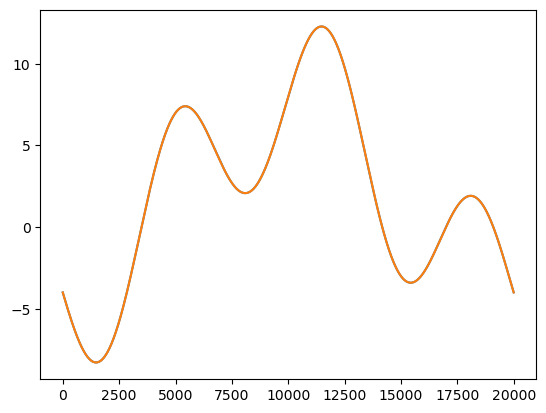

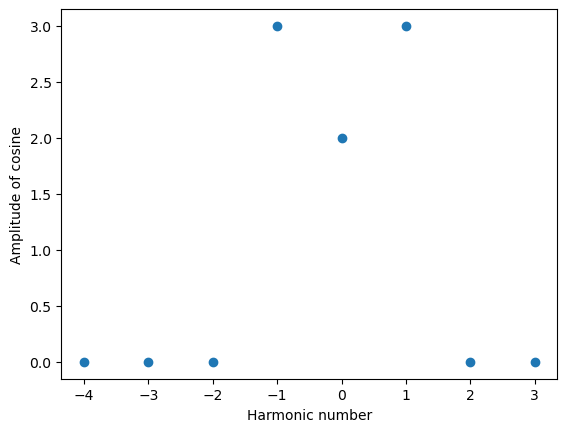

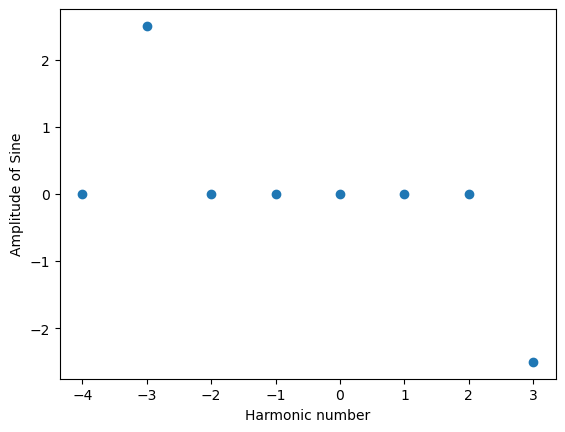

In [558]:
### Fourier series
number_of_fourier_func = 4
#Determine the sin function amplitude
Ck = np.array([])
computed_func = np.zeros(len(x_range)) 
for k in range(-number_of_fourier_func,number_of_fourier_func,1):
    g_x = np.exp(k*np.pi*x_range*1j/L)
    integrand = original_func * np.conj(g_x)
    Ck = np.append(Ck,np.trapz(integrand,x_range)*1/(2*L))
    computed_func = computed_func + Ck[-1]*g_x 

### Note Ck has an imaginary part which yields a real value coefficient 
### when multiplied with the imaginary coefficient 

plt.plot(computed_func.real)
plt.plot(original_func)
print(len(Ck.real))
plt.figure()
plt.plot(list(range(-number_of_fourier_func,number_of_fourier_func,1)),Ck.real,'o')
plt.ylabel("Amplitude of cosine")
plt.xlabel("Harmonic number")
plt.figure()
plt.plot(list(range(-number_of_fourier_func,number_of_fourier_func,1)),Ck.imag,'o')
plt.ylabel("Amplitude of Sine")
plt.xlabel("Harmonic number")

### Fourier transform

#### Fourier transform has an infinite domain L = infinity and has a specific omega given than a harmonic no

#### Determine the FFT for different frequencies (perform FFT) using integration

The length is: 20000


Text(0.5, 0, 'Harmonic number')

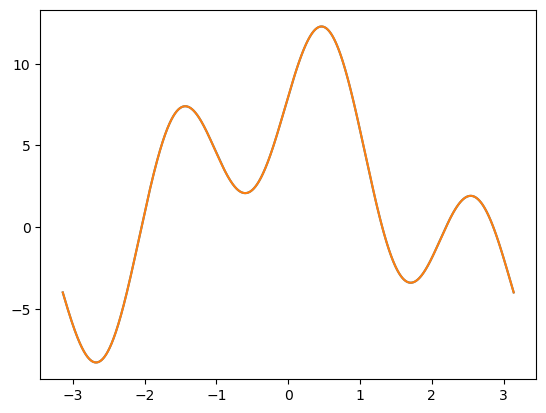

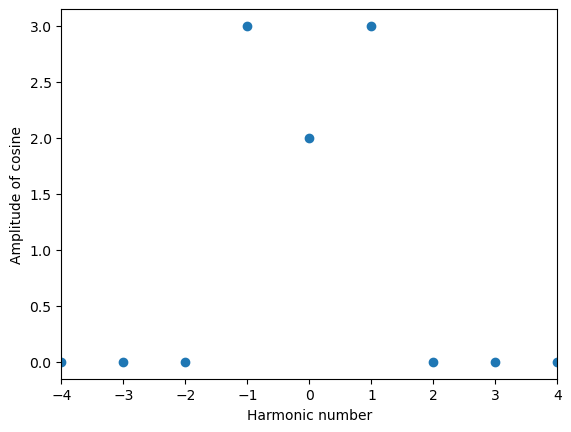

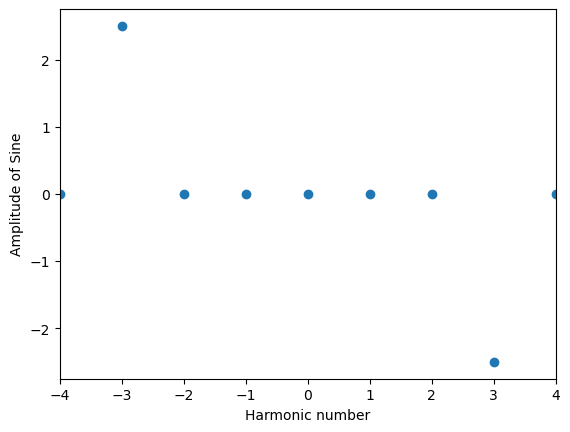

In [673]:
### Even though frequencies from -inf to inf should be considered for application define high frequency range
omega = 5 # should be as high as possible but in this example to decrease the computation a lower number is used
dw = 1 # should be as small as possible but in this example to decrease the computation a higher number is used
omega_range = np.arange(-omega,omega,dw)
x_range = x_range # the previous function is used instead of a function with a domain inf to -inf

### Determine FFT constants
f_w = np.array([]) # Amplitudes of functions with freq w
for omega in omega_range:
    f_w = np.append(f_w,1/(2*np.pi)*np.trapz(original_func*np.exp(-1j*omega*x_range),x_range))

### Inverse FFT to construct the original function from the FFT constants
computed_func = np.array([])
for x in x_range:
    computed_func = np.append(computed_func,np.trapz(f_w*np.exp(1j*x*omega_range),omega_range))
    # computed_func = np.append(computed_func,np.sum(f_w*np.exp(1j*x*omega_range))*dw)


plt.plot(x_range,computed_func.real)
plt.plot(x_range,original_func)
plt.figure()
plt.plot( omega_range,f_w.real,'o')
plt.xlim([-4,4])
plt.ylabel("Amplitude of cosine")
plt.xlabel("Harmonic number")
plt.figure()
plt.plot(omega_range,f_w.imag,'o')
plt.xlim([-4,4])
plt.ylabel("Amplitude of Sine")
plt.xlabel("Harmonic number")

#### Determine the FFT for different frequencies (perform FFT) using np

Hello
-10000.0


Text(0, 0.5, 'Amplitude')

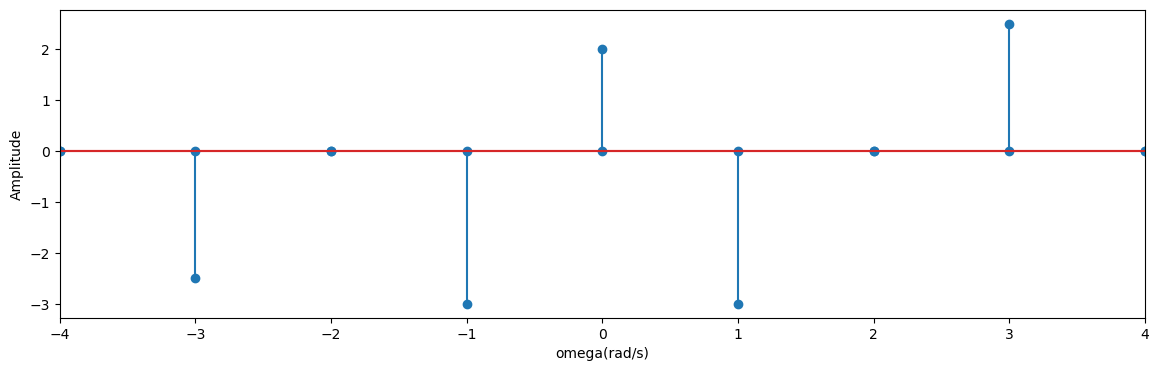

In [1211]:
### Even though frequencies from -inf to inf should be considered for application define high frequency range
Fs = 1/(L*dx) # The sampling frequency is equal to the 1/ time spacing between consequtive samples ( THe highest frequency that can be calculated by FFT)
N = 2/dx  # THe FFT size (N = len(x_range))
delta_f = Fs/N # The frequency resolution ( The minimum frequency that can be represented by FFT) also it equals (delta_f = 1/Total_time = 1/(2*L)
delta_T = 1/Fs # The sampling interval (Total_time/N = 1/Fs = 2*L/(2/dx) = Ldx


def dft_shift(fft_result,delta_f,rad_s=False): 
    ## Returns the frequency ,fft_result paired
    ### Rad_s if true the result will be returned in rad/s otherwize will be returned in Hz
    N =len(fft_result)
    if rad_s:
        factor = delta_f*2*np.pi
    if (N % 2 == 0):
        # even-length: return N+1 values
        return np.arange(-int(N/2), int(N/2) + 1)*factor, np.concatenate((fft_result[int(N/2):], fft_result[:int(N/2)+1]))
    else:
        # odd-length: return N values
        return np.arange(-int((N-1)/2), int((N-1)/2) + 1)*factor, np.concatenate((fft_result[int((N+1)/2):], fft_result[:int((N+1)/2)]))

### Determine FFT constants
def func_plt_fft(fft_result,delta_f,rad_s=False,normalized=False,x_lim=None,absolute=True,stem_plt=True):
    N = len(fft_result)
    if not normalized:
        fft_result = fft_result/N
        
    # freq_range,fft_result = dft_shift(fft_result,delta_f,rad_s) 

    #note np.fft has its own shift function that can be used to replace the dft_shift custom function
    """
    freqs = (np.fft.fftfreq(N,delta_T))*2*np.pi
    freq_range = np.fft.fftshift(freqs)
    fft_result = np.fft.fftshift(fft_result)
    """
    
    if stem_plt:
        plt.figure()
        if absolute: # if absolute then plot the negative coefficients as positive otherwise keep the sign of the coefficients
            plt.stem(freq_range,np.abs(fft_result))
        else:
            plt.stem(freq_range,fft_result.imag)
            plt.stem(freq_range,fft_result.real)
            print("Hello")
            print(freq_range[0])
            
    else:
        plt.figure()
        if absolute: # if absolute then plot the negative coefficients as positive otherwise keep the sign of the coefficients
            plt.plot(freq_range,np.abs(fft_result))
        else:
            plt.plot(freq_range,fft_result)

    if x_lim != None:
        plt.xlim(x_lim)

fft_result = np.fft.fft(original_func) # Amplitudes of functions with freq w
xlim_1 = [-4,4]
func_plt_fft(fft_result,delta_f,rad_s = True,x_lim=xlim_1,absolute=False,stem_plt=True)
plt.xlabel("omega(rad/s)")
plt.ylabel("Amplitude")


### Fourier transform vs Fourier coefficients

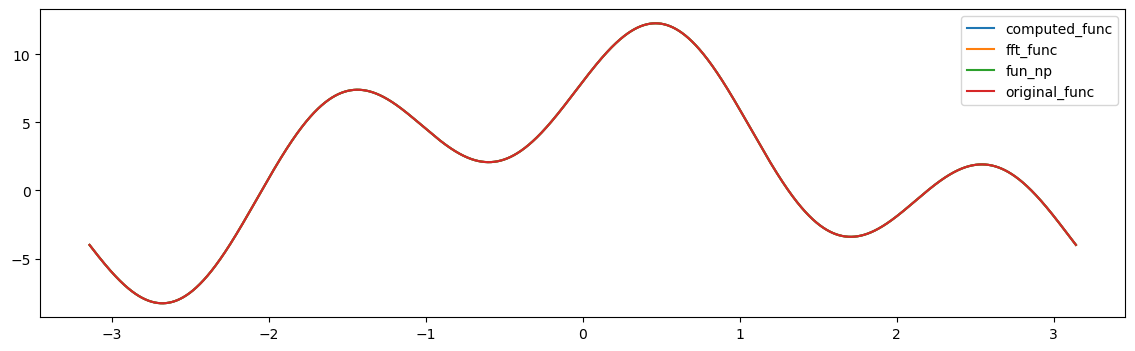

In [1222]:
# Original func 2+ 5*cos(1x) +6*sin(3x) from (-pi to pi)

### Note np.fft calculates the fourier function starting from 0 so u need to shift x_range
### Note the value of cos and sign from -pi to pi have an opposite sign from 0 to 2pi
### Therefore the coefficients have an opposite sign  

### FFT determines amplitude value expressed in real_value + imaginary for each frequency
### The real value amplitude is for cosine and the imaginary is for sine

### Note since the sign of the coefficients of cos and sin of fourier function determined from -pi to pi
## are thee opposite of the ones determined by using FFt from 0 to 2pi 

## THe real part of the cosine value calculated will have a negative sign -6
## The imaginary part of the sine vaule will be -5 
## -2.5 j * jsin(-3x)+ 2.5j*sin(3x) = 2.5j *sin3x +2.5j*jsin(3x) = -5*sin(3x) => note j*j = -1

## x_range_new is from 0 to 2pi which is equal to x_range + np.pi
x_range_new = x_range +L

fft_result = np.fft.fft(original_func) # Amplitudes of functions with freq w

i=0 # The index of fft
func_0=2 #Fourier func coefficient
func_0_1 = fft_result[i]/N # FFt coefficient from np.fft

i=1
omega = 1
amp = -3
func_1 = amp*np.exp(1j*x_range_new*omega) #-3 obtained from the fft shown above
func_1_1 = 1/N*fft_result[1]*np.exp(1j *2*np.pi* i/N*np.arange(N)) # Formula of fft

i=3
omega = 3
amp = 2.5*1j
func_2 = amp*np.exp(1j*x_range_new*omega)
func_2_1 = 1/N*fft_result[i]*np.exp(1j *2*np.pi*i/N*np.arange(N))


i=int(N-1)
omega = -1
amp = -3
func_3 = amp*np.exp(1j*x_range_new*omega)
func_3_1 = (1/N*fft_result[i])*np.exp(1j *2*np.pi* i/N*np.arange(N))

i=int(N-3)
omega = -3
amp = -2.5*1j
func_4 = amp*np.exp(1j*x_range_new*omega)
func_4_1 = 1/N*fft_result[i]*np.exp(1j *2*np.pi* i/N*np.arange(N))

## Compute the original function using 
### computed_func => using formula fourier and coefficients from the fft result
### fun_fft => using formula from numpy documentation ## note 2pi*i/N*np.arange(N) equals x_range_new so i==omega
### fun_np=> using np.ifft function

computed_func = func_0+func_1+func_2+func_3+func_4
func_fft = func_0_1+func_1_1+func_2_1+func_3_1+func_4_1 ## Fun computed fft
fun_np = np.fft.ifft(fft_result) ## compute inverse foru

""" ##General ifft algorithim for np
fft_result = np.fft.fft(original_func) # Amplitudes of functions with freq w
for i in range(int(N)):
    func = fft_result[i]*np.exp(2*np.pi * 1j * i/N*np.arange(N))
    computed_func += func
    if i==3:
        plt.figure()
        plt.plot(func)
computed_func = 1/N *computed_func
plt.figure()
plt.plot(x_range,computed_func.real+computed_func.imag)
"""

plt.figure()
plt.plot(x_range,computed_func)
plt.plot(x_range,func_fft)
plt.plot(x_range,fun_np)
plt.plot(x_range,original_func)
plt.legend(["computed_func","fft_func","fun_np","original_func"])
# plt.plot(x_range,original_func)



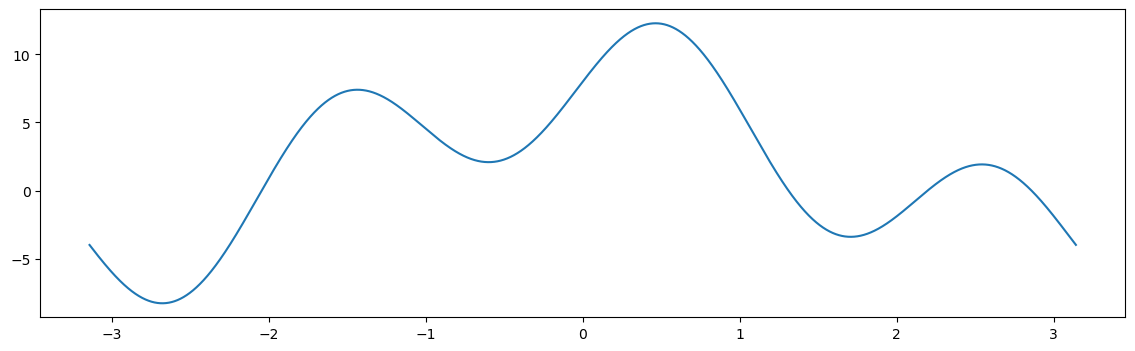

In [997]:
plt.figure()
plt.plot(x_range,computed_func.real)

For i==3 coefficients are 2.5  and 2.5000000000001377


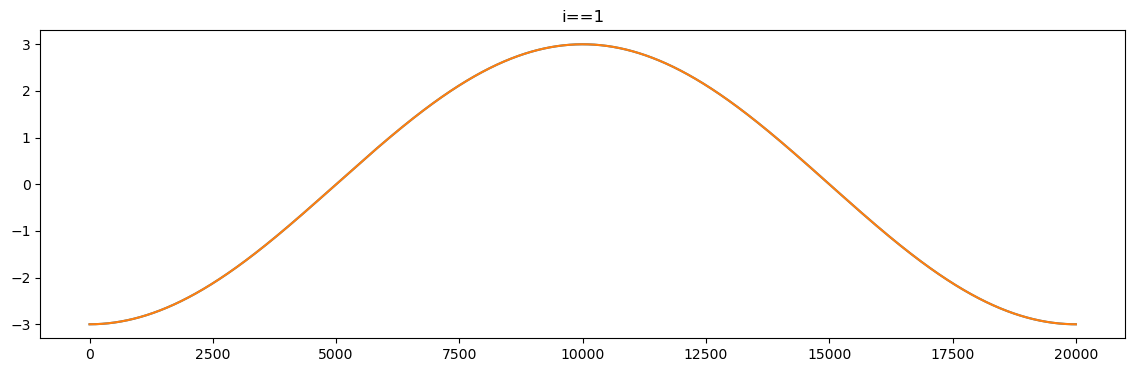

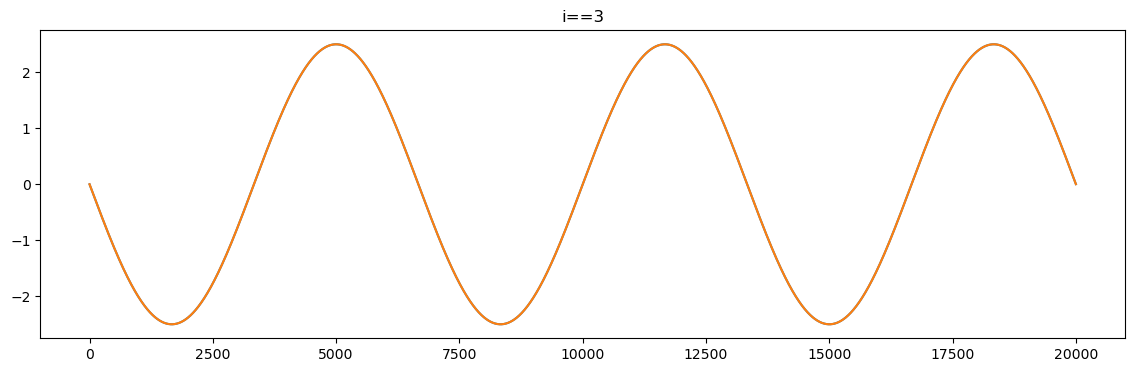

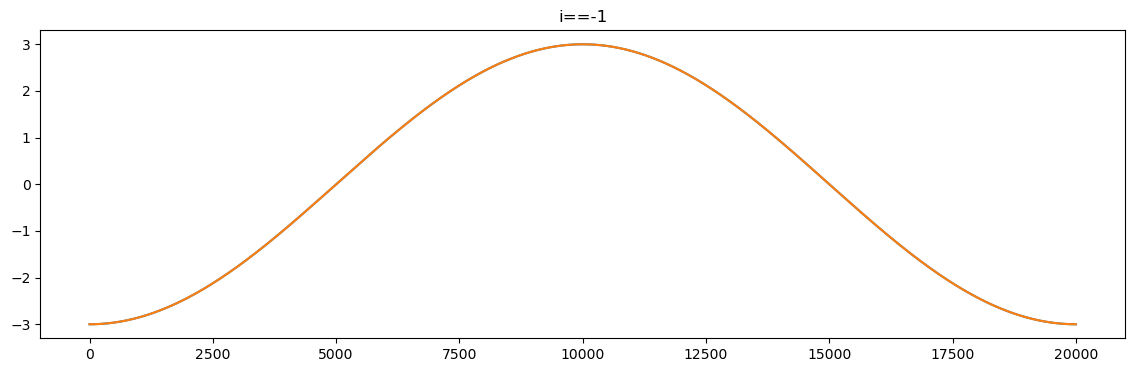

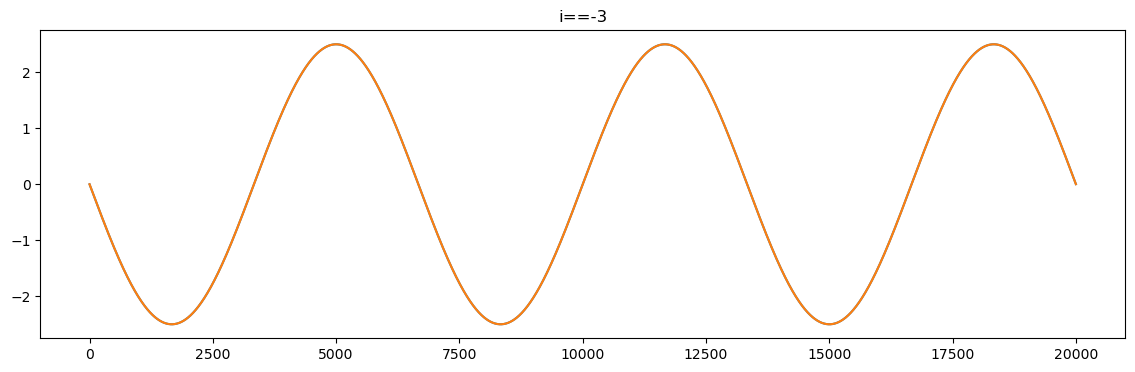

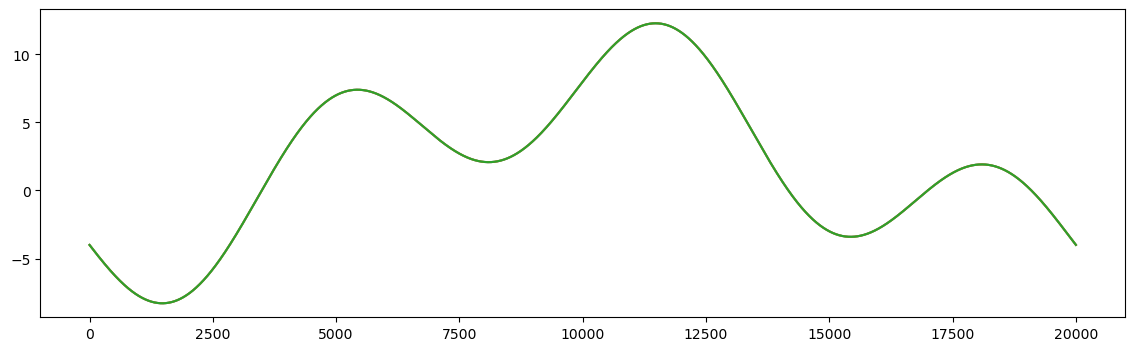

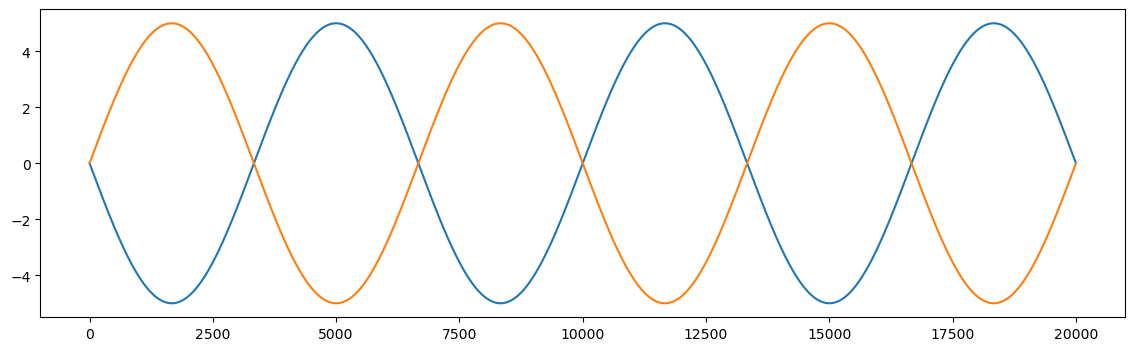

In [1187]:
func_0=2
func_0_1 = 2

i=1
func_1 = -3*np.exp(1j*x_range_new*1)
func_1_1 = 1/N*fft_result[1]*np.exp(1j *2*np.pi* i/N*np.arange(N))

i=3
func_2 = 2.5*1j*np.exp(1j*x_range_new*3)
func_2_1 = 1/N*fft_result[i]*np.exp(1j *2*np.pi* i/N*np.arange(N))
# plt.figure()
# plt.plot(2*np.pi* i/N*np.arange(N))
# plt.plot(np.exp(1j*x_range_new*1))
# print("i 3 is equal to ",1/N*fft_result[i].imag)

i=int(N-1)
func_3 = -3*np.exp(1j*x_range_new*-1)
func_3_1 = (1/N*fft_result[i])*np.exp(1j *2*np.pi* i/N*np.arange(N))

i=int(N-3)
func_4 = -2.5*1j*np.exp(1j*x_range_new*-3)
func_4_1 = 1/N*fft_result[i]*np.exp(1j *2*np.pi* i/N*np.arange(N))

func_np = func_0_1+func_1_1+func_2_1+func_3_1+func_4_1
computed_func = func_0+func_1+func_2+func_3+func_4

plt.figure()
plt.title("i==1")
plt.plot(func_1)
plt.plot(func_1_1)

plt.figure()
plt.title("i==3")
plt.plot(func_2)
plt.plot(func_2_1)


plt.figure()
plt.title("i==-1")
plt.plot(func_3)
plt.plot(func_3_1)

plt.figure()
plt.title("i==-3")
plt.plot(func_4)
plt.plot(func_4_1)

plt.figure()
plt.plot(computed_func)
plt.plot(func_np)
plt.plot(2-5*np.sin(3*x_range_new)-6*np.cos(x_range_new))

plt.figure()
plt.plot(func_4+func_2)
plt.plot(-5*np.sin(3*x_range_new))

print("For i==3 coefficients are",2.5," and",(1/N*fft_result[3]).imag)

# print((1/N*fft_result[3]).imag)


# plt.figure()
# plt.plot(func_4)
# plt.plot(func_4_1)


# plt.figure()
# plt.plot(x_range,func_np.imag+func_np.real)
# plt.plot(x_range,original_func)


# # print(1/N*fft_result[5])
# print(fft_result[3].real/N)
# # plt.figure()
# # plt.plot(np.exp(1j *2*np.pi* 1/N*np.arange(N)))
# # plt.plot(np.exp(1j*x_range_new))


2.5120773083225913e-12


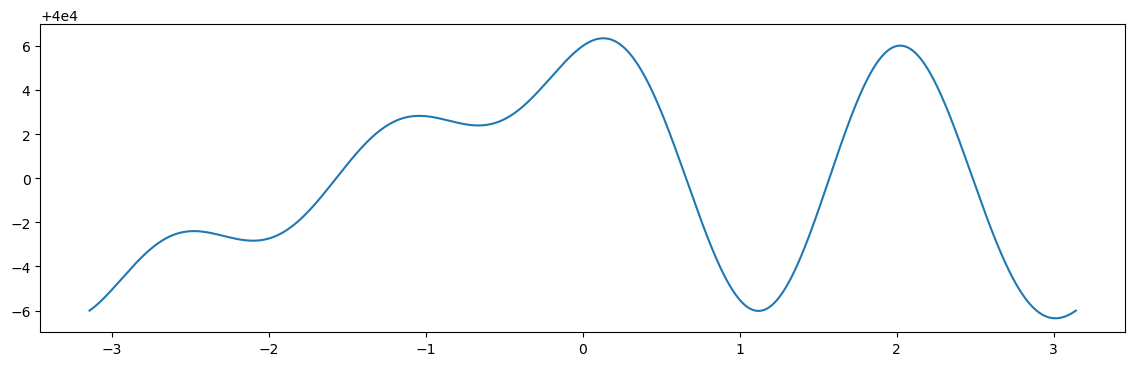

In [1067]:
func_0=2
func_0_1 = fft_result[0]
i=1

func_1 = -3*np.exp(1j*x_range_new*i)
func_1_1 = 1/N*fft_result[1]*np.exp(1j *2*np.pi* i/N*np.arange(N))


i=2
func_2 = -3*np.exp(1j*x_range_new*i)
func_2_1 = 1/N*fft_result[3]*np.exp(1j *2*np.pi* i/N*np.arange(N))

i=3
func_3 = 2.5*np.exp(1j*x_range_new*i)
func_3_1 = 1/N*fft_result[-1]*np.exp(1j *2*np.pi* i/N*np.arange(N))

i=4
func_4 = -2.5*np.exp(1j*x_range_new*i)
func_4_1 = 1/N*fft_result[-3]*np.exp(1j *2*np.pi* i/N*np.arange(N))

func_np = func_0_1+func_1_1+func_2_1+func_3_1+func_4_1

plt.figure()
plt.plot(x_range,func_np)

# print(1/N*fft_result[5])
print(fft_result[3].real/N)
# plt.figure()
# plt.plot(np.exp(1j *2*np.pi* 1/N*np.arange(N)))
# plt.plot(np.exp(1j*x_range_new))


In [979]:
def dft_map(X, Fs, shift=True):
    resolution = float(Fs) / len(X)
    if shift:
        n, Y = dft_shift(X)
    else:
        Y = X
        n = np.arange(0, len(Y))
    f = n * resolution
    return f, Y

(0.0, 10.0)

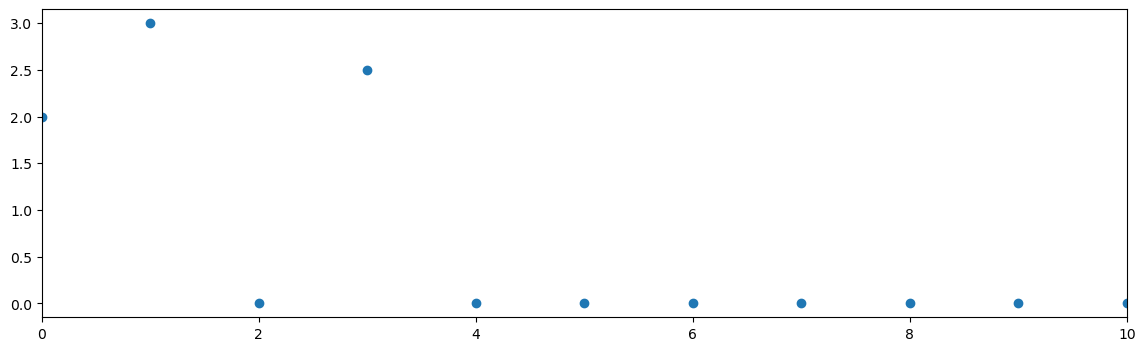

In [980]:
# let's cut the signal otherwise it's too big
Fs = 20000
f, y = dft_map(f_w/20000, Fs)
plt.plot(f, abs(y),'o');
plt.xlim([0,10])

0.3183098861837907 0.3183098861837907


10000.0

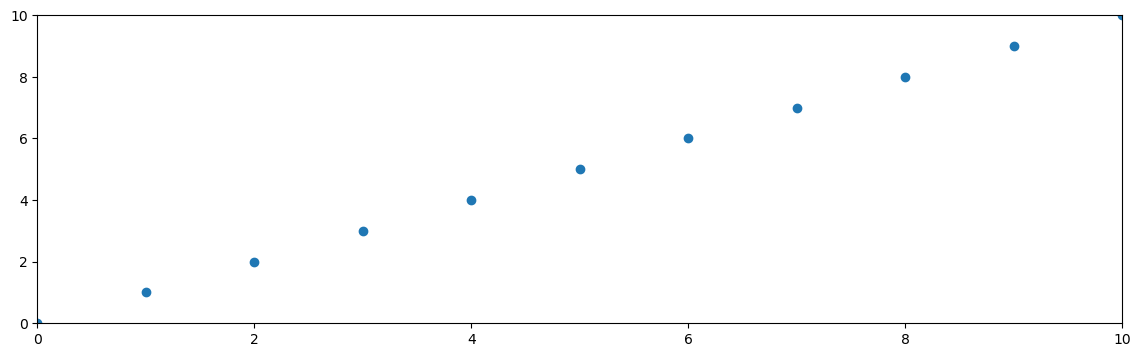

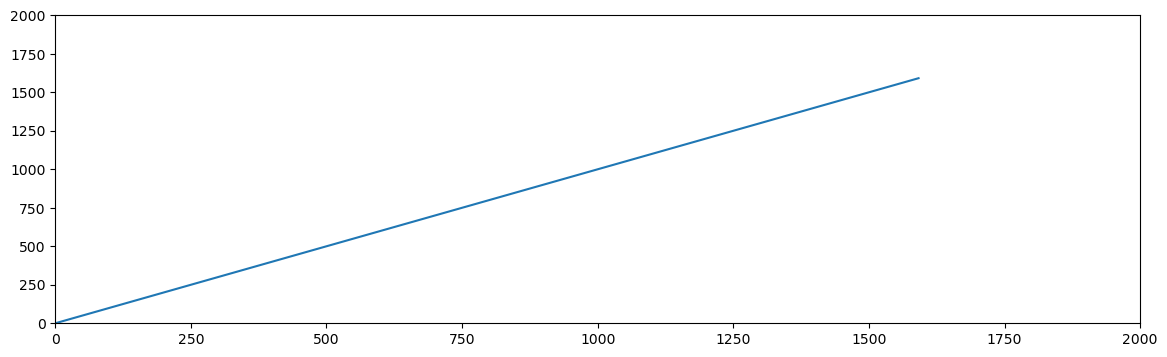

In [883]:
Time_step = L*dx
freq = np.fft.fftfreq(f_w.size, d=Time_step)
omega_freq = freq_range_fft_pos * 2 * np.pi
# freq = np.fft.fftfreq(f_w.size, d=dx/2)
plt.figure()
plt.plot(omega_freq,'o')
plt.xlim([0,10])
plt.ylim([0,10])
freq[1]
plt.figure()
plt.plot(freq_range_fft_pos,freq[:int(N//2)])
plt.xlim([0,2000])
plt.ylim([0,2000])
print(freq[2],freq_range_fft_pos[2])
N//2

In [115]:
integrate_exact = -5*np.cos(np.pi)+6*np.sin(np.pi) - (-5*np.cos(-1*np.pi)+6*np.sin(np.pi))
print(np.trapz(original_func,x_range),integrate_exact)


-0.0018844619300786292 1.7763568394002505e-15


6.283185307179586

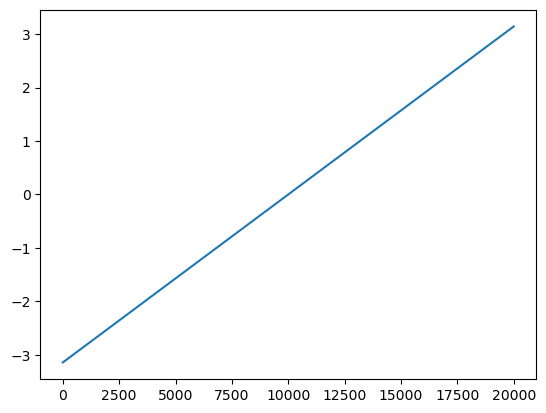

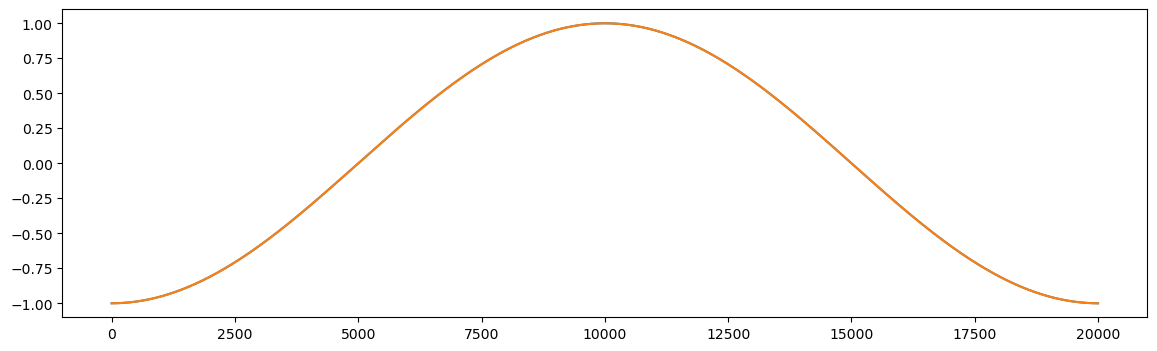

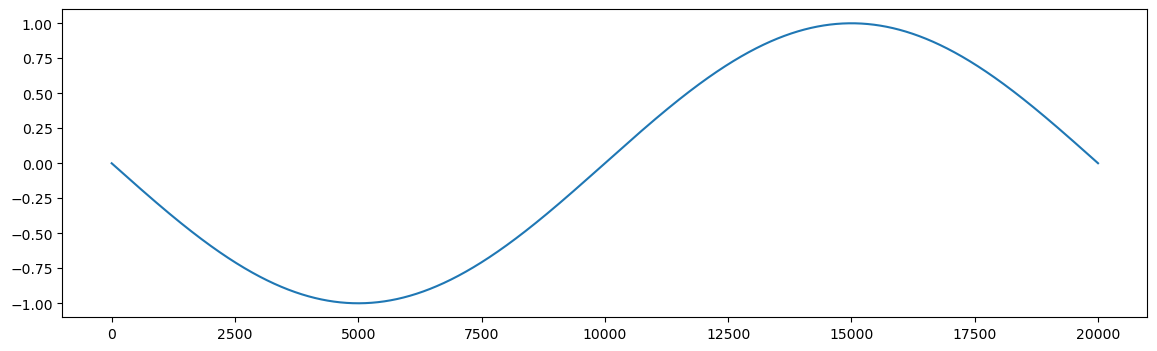

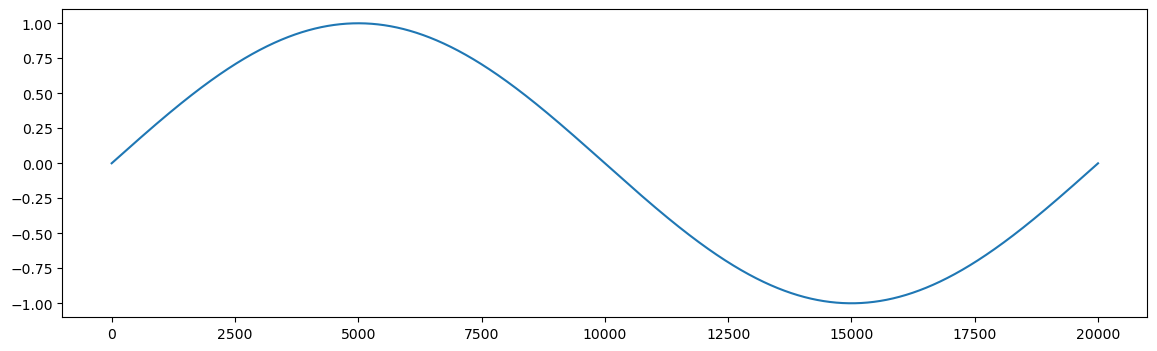

In [1170]:
plt.figure()
plt.plot(np.cos(x_range))
plt.plot(-np.cos(x_range_new))

plt.figure()
plt.plot(np.sin(x_range))

plt.figure()
plt.plot(np.sin(x_range_new))

In [51]:
-5*np.cos(np.pi)+6*np.sin(np.pi)

5.000000000000001

In [56]:
np.sin(x_range[-1])

3.141411976887612e-06

In [58]:
np.sin(np.pi)

1.2246467991473532e-16

In [65]:
-5*np.cos(np.pi)+6*np.sin(x_range[-1]) - (-5*np.cos(x_range[0])+6*np.sin(x_range[0]))

1.884847186239824e-05

In [43]:
-5*np.cos(np.pi)+6*np.sin(x_range[-1])

5.188464554468737

In [44]:
-5*np.cos(np.pi)+6*np.sin(np.pi)

5.000000000000001

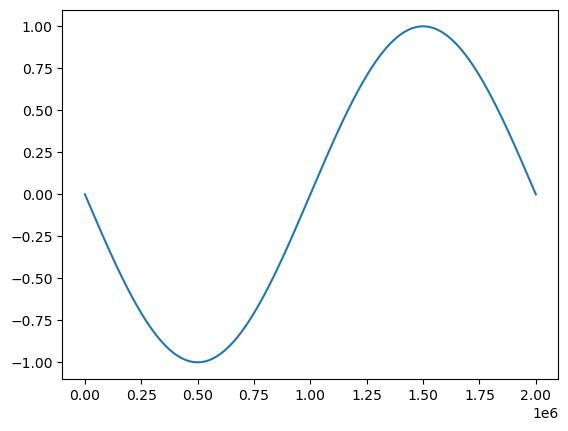

In [61]:
plt.plot(np.sin(x_range))

In [103]:
x_range = np.pi*np.arange(-1,0,0.000001)
np.trapz(np.sin(x_range),x_range)

-1.9999999999934208

In [109]:
np.cos(x_range[0])-np.cos(x_range[-1])

-1.9999999999950655

In [108]:
np.cos(-np.pi)-np.cos(0)

-2.0

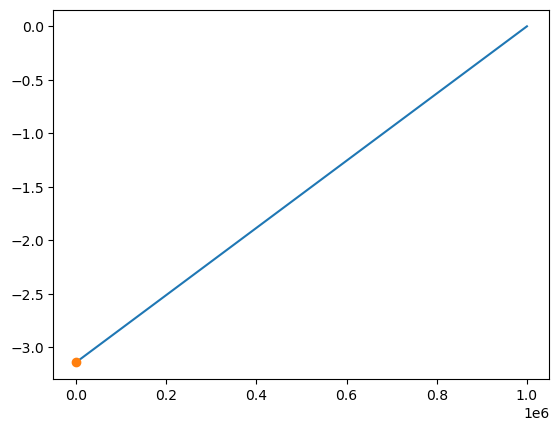

In [106]:
plt.plot(x_range)
plt.plot(x_range[0],'o')

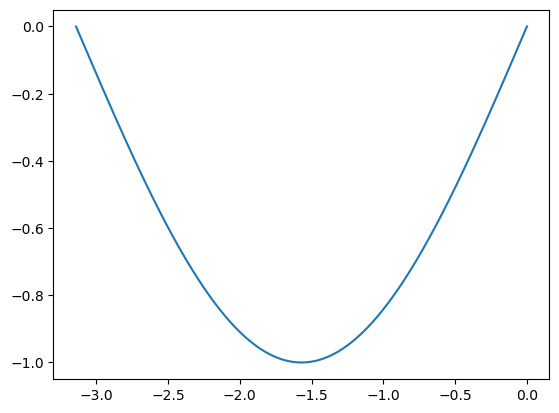

In [107]:
plt.plot(x_range,np.sin(x_range))

In [194]:
# a = np.sin(np.arange(-1,1,0.01)*np.pi)
# print(np.trapz(a*a,x=(np.arange(-1,1,0.01)*np.pi)))
# print(np.dot(a,a))

3.1415771555511096
99.99999999999991


In [178]:
#a

In [187]:
np.sum(a*a)


10.000000000000002

In [190]:
np.dot(a,a)

10.000000000000004

In [301]:
np.dot(np.sin(x_range),np.cos(x_range))

9.094947017729282e-13

In [255]:
e**x_rangej

NameError: name 'e' is not defined

In [260]:
np.dot(np.exp(x_range*1j),np.exp(x_range*-1j))

(20000+0j)

In [302]:
np.dot(np.cos(x_range),np.cos(x_range))

9999.999999998898

In [380]:
np.dot(np.ones_like(x_range),np.ones_like(x_range)) 

20000.0

In [392]:
np.dot(original_func,np.ones_like(x_range)) * dx*L

12.566370614363324

In [386]:
np.sum(original_func*np.ones_like(x_range)) * dx

4.000000000001323

In [393]:
np.trapz(original_func,x_range) 

12.567626511156647

In [385]:
dx

0.0001